In [91]:


import warnings
warnings.filterwarnings("ignore")

import os
import sys
sys.path.insert(0, '/home/disk/p/jkcm/Code')
import matplotlib as mpl
import pickle
import seaborn as sns
import numpy as np
from matplotlib import colors
from matplotlib.lines import Line2D
import pandas as pd
import glob
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from classified_cset import utils
import pandas as pd
from matplotlib.image import NonUniformImage


labels={0: 'Closed-cellular MCC', 1: 'Clustered cumulus', 2: 'Disorganized MCC',
        3: 'Open-cellular MCC', 4: 'Solid Stratus', 5: 'Suppressed Cu'}
short_labels = {0: 'Closed MCC ', 1: 'Clust. Cu', 2: 'Disorg. MCC',
        3: 'Open MCC', 4: 'Solid St', 5: 'Supp. Cu'}
%load_ext autoreload
%autoreload 2
print("we workin'!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
we workin'!


In [92]:
df0103 = pd.read_csv(f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEA_2001-2003.csv', index_col=0, parse_dates=['date'])
df0710 = pd.read_csv(f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEA_2007-2010.csv', index_col=0, parse_dates=['date'])
df10 = pd.read_csv(f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEA_2010.csv', index_col=0, parse_dates=['date'])
for df in [df0103, df0710, df10]:
    df['named_cat'] = df.apply(lambda x: short_labels[x['cat']], axis=1)
#     df['date'] = pd.DatetimeIndex(df['date'])

df_all = pd.concat([df0103, df0710], ignore_index=True)
df_all['year'] = pd.DatetimeIndex(df_all.date.values).year

In [94]:
df_all['month'] = pd.DatetimeIndex(df_all.date.values).month

In [96]:
print(np.unique(df_all.month))
np.unique(df_all.year)

[9]


array([2001, 2002, 2003, 2007, 2008, 2009, 2010])

In [ ]:
best additions:
    2012, 2013 (from Abel)
    augusts (from Watson-Parris)

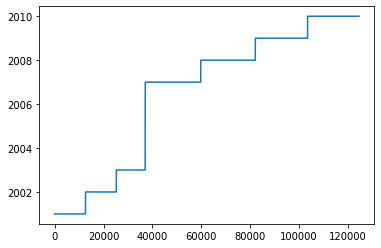

In [34]:
plt.plot(pd.DatetimeIndex(df_all.date.values).year)

In [61]:
np.log10(1)

0.0

In [83]:
def plot_all_dists(df, gridsize=50, lower=1, upper=100):
    llr = {'lat':(-30,20), 'lon':(-45,20)}
    ticks = np.logspace(np.log10(lower*1e-2), np.log10(upper*1e-2), 21)#[:-1]
    bnorm = colors.BoundaryNorm(boundaries=ticks, ncolors=256)


    fig, ax = plt.subplots()
    b = utils.bmap(ax=ax, llr=llr)
    image = b.hexbin(df['lon'], df['lat'], gridsize=gridsize, extent=(*llr['lon'], *llr['lat']))
    all_counts = image.get_array()+1
    plt.close()

    polycollections = dict()

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,12), sharex=True, sharey=True)
    axn = ax.flatten()
    for cat, name  in utils.labels.items():
        axi = axn[utils.ordering.index(cat)]
        df_sub = df[df['cat']==cat]
        par_labs = [1, 0, 0, 0] if cat in [4, 3] else [0, 0, 0, 0]
        mer_labs = [0, 0, 0, 1] if cat in [3, 1, 5] else [0, 0, 0, 0]
        b = utils.bmap(ax=axi, llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=30)

        image = b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=gridsize, extent=(*llr['lon'], *llr['lat']), norm=bnorm, cmap='jet')
        normed_counts = image.get_array()/all_counts
        normed_counts[all_counts==1] = np.nan
        image.set_array(normed_counts)

        polycollections[cat]=image
        nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(df))}%)"
        axi.set_title(name)
        axi.annotate(nstr, xy=(0.97, 0.82), xycoords='axes fraction', fontsize=11, c='k', ha='right', bbox={'facecolor': 'w', 'edgecolor': 'k'})

        b.drawgreatcircle(15, -34, -16, 11, c='w')

    # add_labels(axn)    
    for i, axi in enumerate(axn):
        axi.text(0.01, 0.99, f"({chr(ord('a') + i)})", fontsize=12, backgroundcolor='w',
                 horizontalalignment='left', verticalalignment='top', transform=axi.transAxes)

    # plt.subplots_adjust(hspace=0.1, wspace=0.1)

    cb = plt.colorbar(image, ax=axn, ticks=ticks, orientation='horizontal', pad=0.1)
    cb.set_ticklabels([f"{i:0.0%}" for i in [0]+list(ticks[1:])])
    cb.set_label("Relative frequency of occurrence (log scale)", fontsize=12)
    return fig, ax
    # fig.savefig('/home/disk/p/jkcm/plots/measures/final/SEP_classifications_map.png', bbox_inches='tight')

Text(0.5, 0.95, '7 years (2001-2003, 2007-2010)')

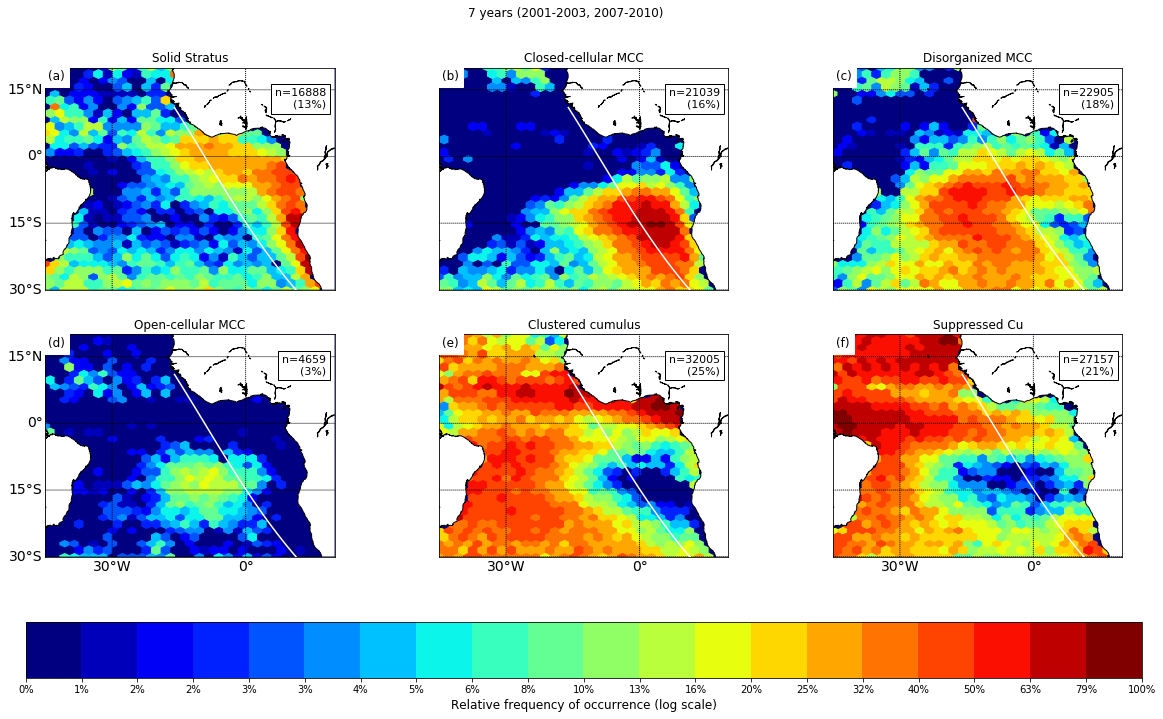

In [90]:
fig, _ = plot_all_dists(df_all, gridsize=30, lower=1, upper=100)
fig.suptitle('7 years (2001-2003, 2007-2010)', y=0.95)

Text(0.5, 0.95, '2010 only')

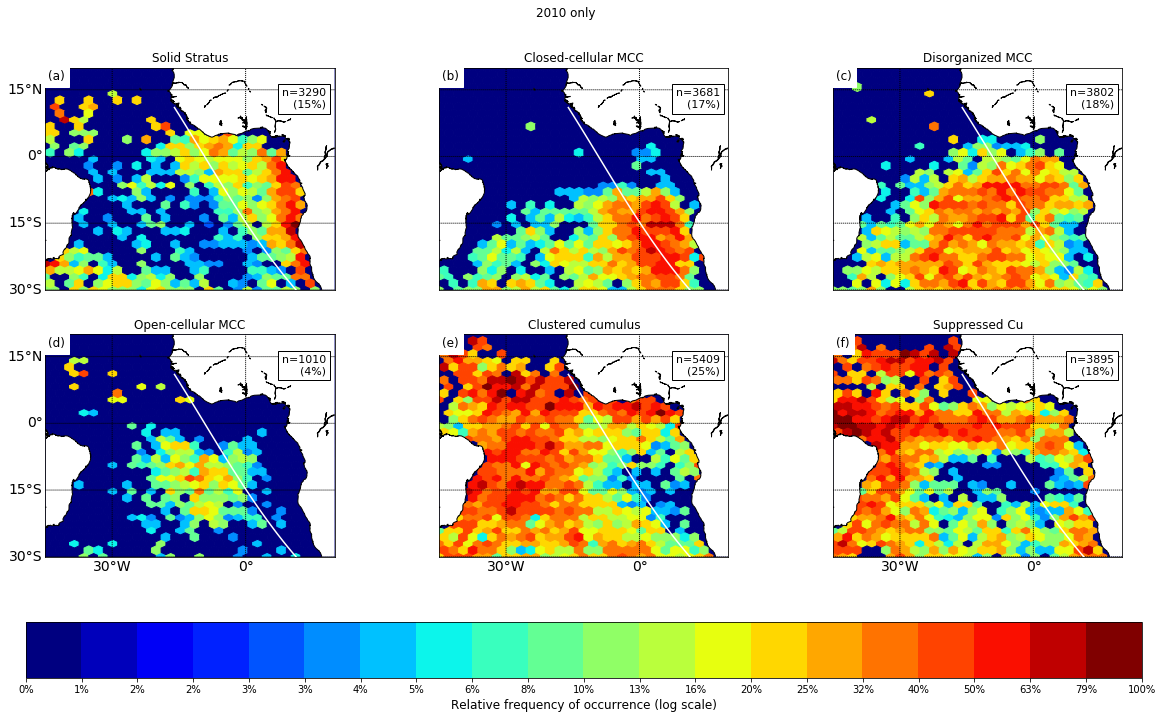

In [88]:
fig, _ = plot_all_dists(df10, gridsize=30)
fig.suptitle('2010 only', y=0.95)

Text(0.5, 0.95, '3 years (2001-2003)')

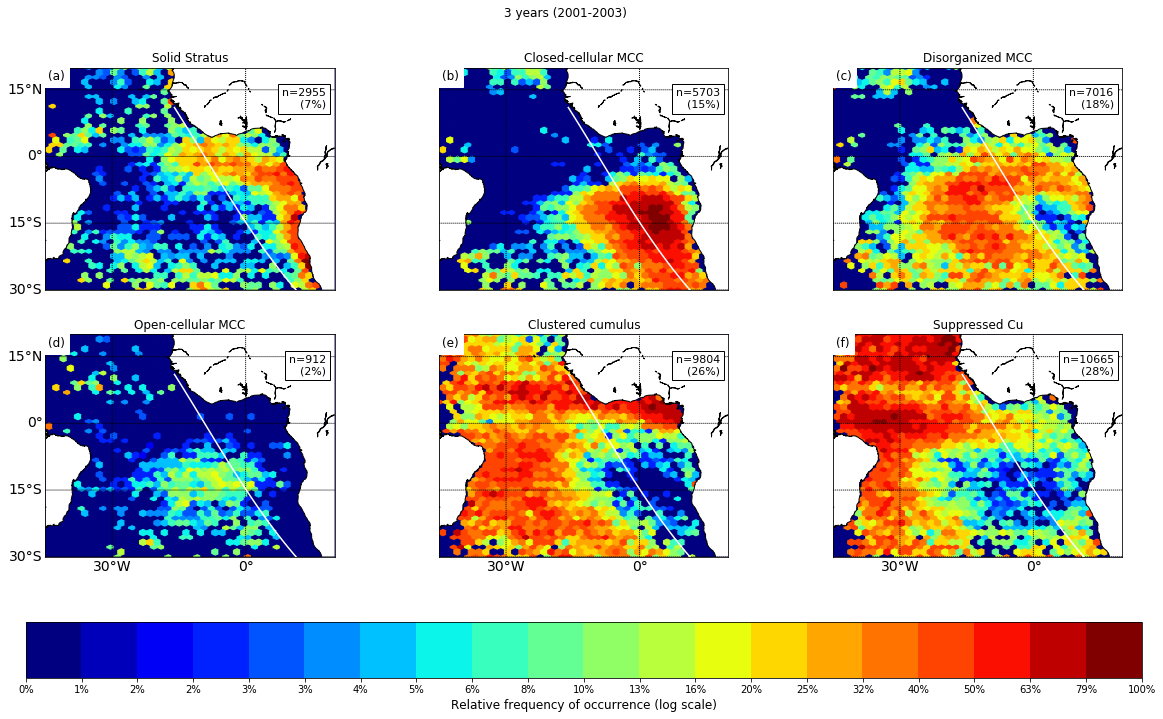

In [89]:
fig, _ = plot_all_dists(df0103, gridsize=40)
fig.suptitle('3 years (2001-2003)', y=0.95)

Text(0.5, 0.95, '3 years (2007-2009)')

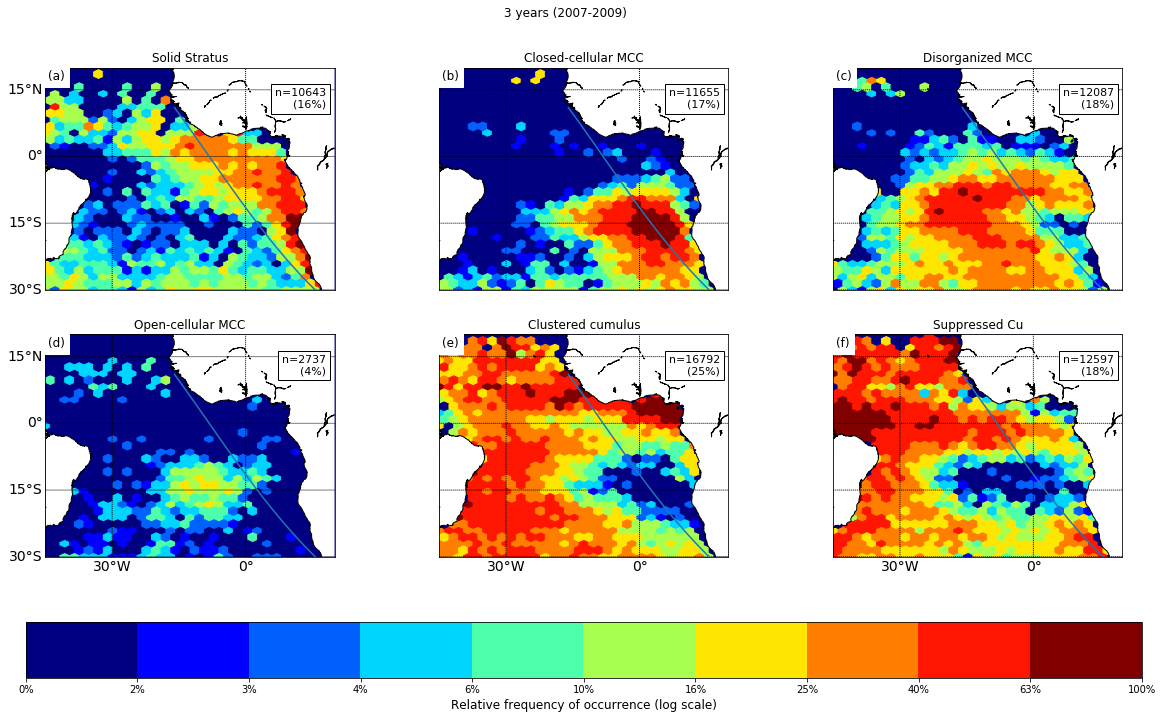

In [52]:
fig, _ = plot_all_dists(plot_df1)
fig.suptitle('3 years (2007-2009)', y=0.95)

In [48]:
np.linspace(-10, 10, 21)

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [59]:
def plot_all_dists_difference(df, df2, gridsize=40):
    llr = {'lat':(-30,20), 'lon':(-45,20)}
#     ticks = np.logspace(-2, 0, 21)#[:-1]
    ticks = np.linspace(-0.2, 0.2, 21)
    bnorm = colors.BoundaryNorm(boundaries=ticks, ncolors=256)

#     gridsize=50

    fig, ax = plt.subplots()
    b = utils.bmap(ax=ax, llr=llr)
    image = b.hexbin(df['lon'], df['lat'], gridsize=gridsize, extent=(*llr['lon'], *llr['lat']))
    all_counts = image.get_array()+1
    plt.close()

    
    fig, ax = plt.subplots()
    b = utils.bmap(ax=ax, llr=llr)
    image = b.hexbin(df2['lon'], df2['lat'], gridsize=gridsize, extent=(*llr['lon'], *llr['lat']))
    all_counts2 = image.get_array()+1
    plt.close()

    
    polycollections = dict()

    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,12), sharex=True, sharey=True)
    axn = ax.flatten()
    for cat, name  in utils.labels.items():
        axi = axn[utils.ordering.index(cat)]
        df_sub = df[df['cat']==cat]
        df_sub2 = df2[df2['cat']==cat]
        par_labs = [1, 0, 0, 0] if cat in [4, 3] else [0, 0, 0, 0]
        mer_labs = [0, 0, 0, 1] if cat in [3, 1, 5] else [0, 0, 0, 0]
        b = utils.bmap(ax=axi, llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=30)

        fig2, ax2 = plt.subplots()
        b2 = utils.bmap(ax=ax2, llr=llr)
        image2 = b.hexbin(df_sub2['lon'], df_sub2['lat'], gridsize=gridsize, extent=(*llr['lon'], *llr['lat']))
        normed_counts2 = image2.get_array()/all_counts2
        plt.close(fig2)

        image = b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=gridsize, extent=(*llr['lon'], *llr['lat']), norm=bnorm, cmap='bwr')
        normed_counts = image.get_array()/all_counts
        normed_counts[all_counts==1] = np.nan
        image.set_array(normed_counts-normed_counts2)

        polycollections[cat]=image
        nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(df))}%)"
        axi.set_title(name)
#         axi.annotate(nstr, xy=(0.97, 0.82), xycoords='axes fraction', fontsize=11, c='k', ha='right', bbox={'facecolor': 'w', 'edgecolor': 'k'})

        b.drawgreatcircle(20, -34, -16, 11)

    # add_labels(axn)    
    for i, axi in enumerate(axn):
        axi.text(0.01, 0.99, f"({chr(ord('a') + i)})", fontsize=12, backgroundcolor='w',
                 horizontalalignment='left', verticalalignment='top', transform=axi.transAxes)

    # plt.subplots_adjust(hspace=0.1, wspace=0.1)

    cb = plt.colorbar(image, ax=axn, ticks=ticks, orientation='horizontal', pad=0.1)
    cb.set_ticklabels([f"{i:0.0%}" for i in list(ticks)])
    cb.set_label("Difference in frequency of occurrence", fontsize=12)
    return fig, ax
    # fig.savefig('/home/disk/p/jkcm/plots/measures/final/SEP_classifications_map.png', bbox_inches='tight')

Text(0.5, 0.95, '2010-2002 difference')

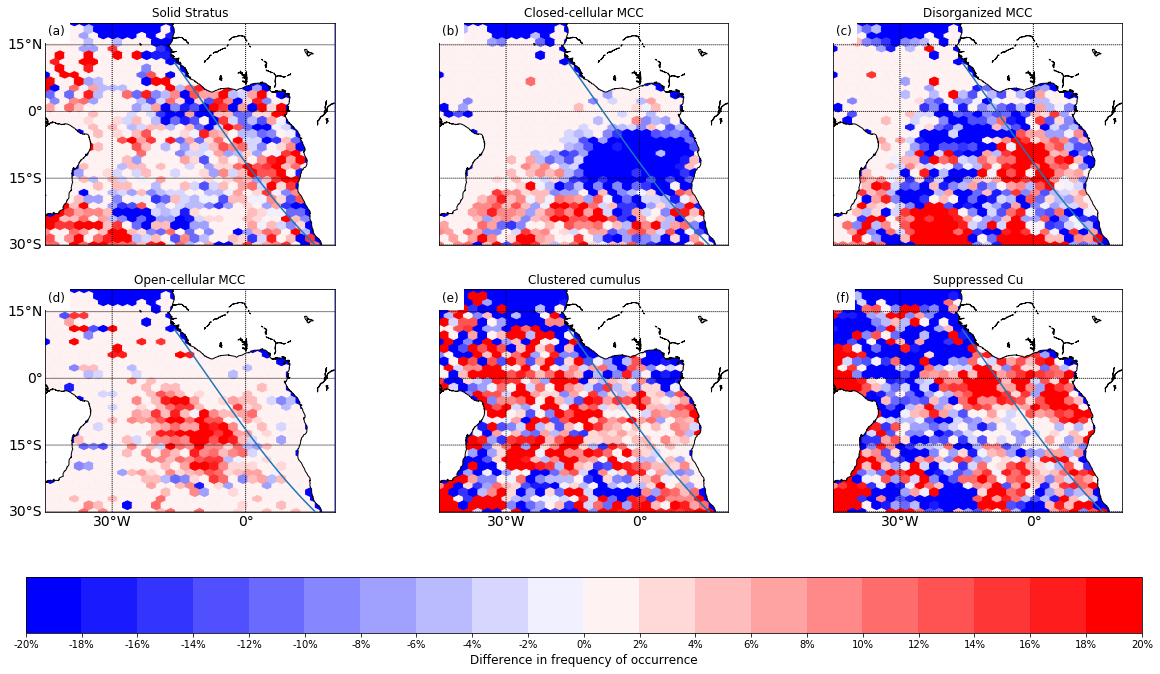

In [60]:
fig, _, plot_all_dists_difference(df_all[df_all.year==2010], df_all[df_all.year==2002], gridsize=30)
fig.suptitle('2010-2002 difference', y=0.95)

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


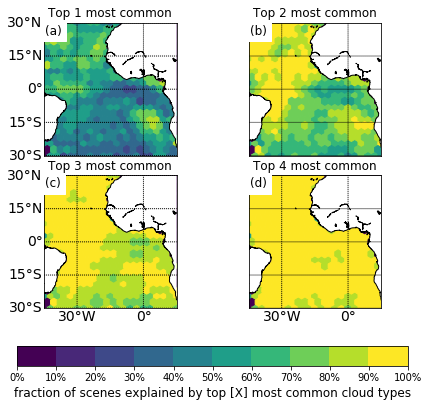

In [86]:
offsets = [i.get_offsets() for _,i in polycollections.items()]
vals = np.array([i.get_array() for _,i in polycollections.items()])
sorted_vals = vals.copy()
sorted_vals.sort(axis=0)
cumsum = np.cumsum(sorted_vals[::-1], axis=0)

llr = {'lat':(-30,30), 'lon':(-45,15)}
cmap = plt.get_cmap('viridis', 10)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7), sharex=True, sharey=True)
axn = ax.flatten()
for i in range(4):
    axi = axn[i]
    par_labs = [1, 0, 0, 0] if i%2==0 else [0, 0, 0, 0]
    mer_labs = [0, 0, 0, 1] if i in [2,3] else [0, 0, 0, 0]
    b = utils.bmap(ax=axi, llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=30)
    image = b.hexbin(plot_df['lon'], plot_df['lat'], gridsize=20, extent=(*llr['lon'], *llr['lat']), vmin=0, vmax=100, cmap=cmap)
    image.set_array(cumsum[i]*100)
    nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(plot_df))}%)"
    axi.set_title(f'Top {i+1} most common')
    axi.text(0.01, 0.99, f"({chr(ord('a') + i)})", fontsize=12, backgroundcolor='w',
             horizontalalignment='left', verticalalignment='top', transform=axi.transAxes)

plt.subplots_adjust(hspace=0.15, wspace=0.1)

cb = plt.colorbar(image, ax=axn, orientation='horizontal', pad=0.1)
cb.set_ticks(np.linspace(0,100,11))
cb.set_ticklabels([f"{i:0.0%}" for i in np.linspace(0,1,11)])
cb.set_label("fraction of scenes explained by top [X] most common cloud types", fontsize=12)
# fig.savefig('/home/disk/p/jkcm/plots/measures/final/top_X_most_common.png', bbox_inches='tight')

In [77]:
abel_data = xr.open_dataset('/home/disk/eos4/jkcm/Data/MEASURES/abel_data/open_cell_climatology_modified_size.nc')
# abel_data = abel_data.where(np.logical_and(abel_data.time>np.datetime64('2001-01-01'),abel_data.time<np.datetime64('2003-12-31')), drop=True)
our_data = df_all.copy()
#plot comparing our classifications to theirs.Get their data, get all the Septembers from 2001-2003, 
# then for each of our class-ger their frac of open making some assupmptions about scene geoimetry

In [78]:
def get_overlap_and_size(lat, lon, date, size):
    subs = abel_data.sel(dict(time=date, lat=slice(lat-size, lat+size), lon=slice(lon-size, lon+size)))
    if 0 in subs.open_cell.shape:
        return np.nan, np.nan
    else:
        return np.mean(subs.open_cell.values), np.product(subs.open_cell.shape)

In [79]:
our_data['overlap'] = our_data.apply(lambda x: get_overlap_and_size(x['lat'], x['lon'], x['date'].to_datetime64().astype('datetime64[D]'), size=0.5), axis=1)
our_data['abel_open_cell_frac'] = our_data.apply(lambda x: x['overlap'][0], axis=1)
our_data['abel_match_frac'] = our_data.apply(lambda x: x['overlap'][1], axis=1)
our_data['abel_match_frac'] = our_data['abel_match_frac']/np.max(our_data['abel_match_frac'])

In [131]:
data_overlap = our_data[our_data.abel_match_frac==1]
#data_overlap is just the scenes of ours where we are 100% overlapping with an abel classification
frac_overlap = np.sum(our_data.abel_match_frac==1)/len(our_data)
frac_none = np.sum(np.isnan(our_data.abel_match_frac))/len(our_data)
print(f"about {frac_overlap:0.0%} ({np.sum(our_data.abel_match_frac==1)}) scenes have full overlap with Abel classifications.")
print(f"Most of the rest ({frac_none:0.0%}) have no overlap at all.")

about 13% (4809) scenes have full overlap with Abel classifications.
Most of the rest (63%) have no overlap at all.


scenes that are >90% open-cell: 5%
scenes that are <10% open-cell: 86%
scenes that are 10%-90% open-cell: 9%


/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


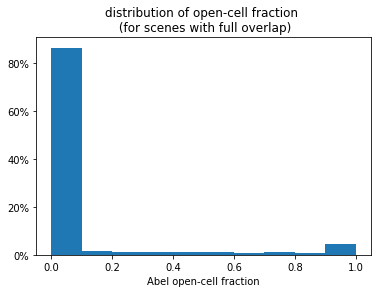

In [130]:
plt.hist(data_overlap['abel_open_cell_frac'], weights=np.ones(len(data_overlap))/len(data_overlap));
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Abel open-cell fraction')
plt.title("distribution of open-cell fraction \n (for scenes with full overlap)");
open_cell = np.sum(data_overlap.abel_open_cell_frac>0.9)/len(data_overlap)
not_open_cell = np.sum(data_overlap.abel_open_cell_frac<0.1)/len(data_overlap)
print(f"scenes that are >90% open-cell: {open_cell:0.0%}")
print(f"scenes that are <10% open-cell: {not_open_cell:0.0%}")
print(f"scenes that are 10%-90% open-cell: {(1-open_cell-not_open_cell):0.0%}")

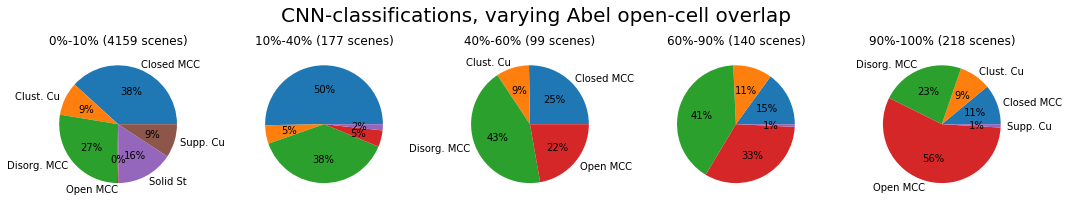

In [134]:
ranges = [0, 0.1, 0.4, 0.6, 0.9, 1]

fig, ax = plt.subplots(ncols=5, figsize=[15,3])

for i, lower in enumerate(ranges[:-1]):
    upper = ranges[i+1]
    our_data_where_Abel_open_cell = data_overlap[np.logical_and(
        data_overlap['abel_open_cell_frac']>=lower, data_overlap['abel_open_cell_frac']<=upper)].copy()
    
#     our_data_where_Abel_open_cell['named_cat'] = our_data_where_Abel_open_cell.apply(lambda x: short_labels[x['cat']], axis=1)
    our_class = our_data_where_Abel_open_cell.named_cat.value_counts().sort_index()
    if i in [0, 2, len(ranges[:-2])]:
        pie = our_class.plot.pie(ax=ax[i], autopct='%0.0f%%')
    else:
        pie = our_class.plot.pie(ax=ax[i], labels=None, autopct='%0.0f%%')
    pie.set_title(f'{lower:0.0%}-{upper:0.0%} ({len(our_data_where_Abel_open_cell)} scenes)')
    pie.set_ylabel('');
plt.suptitle("CNN-classifications, varying Abel open-cell overlap", fontsize=20, y=1.03)
plt.tight_layout()


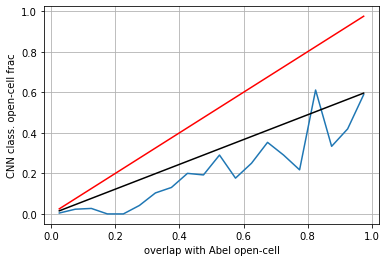

In [150]:
#our open_cell as a function of Abel open_cell:
ranges = np.linspace(0,1,21)
CNN_fracs = np.zeros_like(ranges[:-1])
abel_fracs = np.zeros_like(CNN_fracs)
for i,lower in enumerate(ranges[:-1]):
    upper=ranges[i+1]
    our_data_where_Abel_open_cell = data_overlap[np.logical_and(
        data_overlap['abel_open_cell_frac']>=lower, data_overlap['abel_open_cell_frac']<=upper)].copy()
    
    CNN_fracs[i] = np.sum(our_data_where_Abel_open_cell.cat==3)/len(our_data_where_Abel_open_cell)
    abel_fracs[i] = len(our_data_where_Abel_open_cell)/len(data_overlap)

plt.plot(ranges[:-1]+0.025, CNN_fracs)
plt.grid(True)
plt.ylabel('CNN class. open-cell frac')
plt.xlabel('overlap with Abel open-cell');
plt.plot(ranges[:-1]+0.025, ranges[:-1]+0.025, 'r')
plt.plot(ranges[:-1]+0.025, (ranges[:-1]+0.025)*np.max(CNN_fracs), 'k')
# plt.plot(ranges, (ranges)**4, 'g')

# ax2 = plt.twinx()
# ax2.plot(ranges[:-1]+0.05, abel_fracs, c='r')

In [145]:
open_cell

array([0.00456841, 0.01470588, 0.01754386, 0.11538462, 0.19607843,
       0.25      , 0.29268293, 0.25925926, 0.44444444, 0.56422018])

In [152]:
our_data_where_Abel_open_cell = data_overlap[data_overlap['abel_open_cell_frac']>=0.9].copy()
    pd.DataFrame(np_array).to_csv("path/to/file.csv")


In [160]:
our_data_where_Abel_open_cell.refl_img.to_csv('/home/disk/p/jkcm/dump/abel_open_cell_scenes.csv')